# About Donorschoose organisation


DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.



Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve: 
* How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible
* How to increase the consistency of project vetting across different volunteers to improve the experience for teachers
* How to focus volunteer time on the applications that need the most assistance</li>
   


The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.

## Understand the DonorsChoose Data Set's Attributes

There are two files:   1.train_data.csv(consists 17 features)

                2.resources.csv(consists 4 features)

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data


Prior to May 17, 2016, the prompts for the essays were as follows:
* __project_essay_1:__ "Introduce us to your classroom"</li>
* __project_essay_2:__ "Tell us more about your students"</li>
* __project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
* __project_essay_4:__ "Close by sharing why your project will make a difference"</li>




Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:
__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."


__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"


For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.


### importing all necessary modules

In [1]:
#import all necessary modules
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from tqdm import tqdm
import os

from collections import Counter

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection  
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.naive_bayes import MultinomialNB

## 1. Reading Data

In [2]:
#load two datafiles into the dataframe
project_data = pd.read_csv('train_data.csv')
resources_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
#dataframe
project_data.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0


In [5]:
#dataframe
resources_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [6]:
#print number of datapoints and columns in resources_data
print('number of datapoints in resources_data:',resources_data.shape)
print("*"*80)
print('total features in resources_data:', resources_data.columns)

number of datapoints in resources_data: (1541272, 4)
********************************************************************************
total features in resources_data: Index(['id', 'description', 'quantity', 'price'], dtype='object')


**observation:**
* in project data we have 109248 datapoints(rows) and 17 features (columns).
* in resources_data we have 1541272 datapoints and  4 features(columns)

**'Project_is_approved'** Attribute:
* in the project_proposal_data' dataframe we have  'project is approved'  Attribute, it consists with 2 values that are [1]Number of projects approved and [0] number of projects not approved.

# 2. text preprocessing ( text data& categorical data)

### 2.1 project_subject_categories:

####project_subject_categories:
   examples:
    1. Literacy & Language
    2. Math & Science
    3. Music & The Arts
    4. Special Needs
    5. Warmth
    6. Music & The Arts
    7. Literacy & Language, Math & Science..etc.

in the above data there are some special charecters we have to remove that special symbols, replace symbols(&) with _, replace space with empty,replace the with empty


**remove and replace  unwanted symbols, special charecters and words**

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
l = []  #creat empty list
for i in catogories:      #each category ex"math&Scince" in catogeries ex[["Math & Science", "Warmth", "Care & Hunger"]]
    temp = ""       #empty
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts 
        if 'The' in j.split(): # this will split each of the catogory based on space 
            j=j.replace('The','') # if we have the words "The" we are going to replace it with '' empty
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) 
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') 
    l.append(temp.strip())
# l is list with all cleaned categories.

In [8]:
project_data['clean_proj_categories'] = l    #creat new attribute and store all cleaned catogeries into that attribute, 
project_data.drop(['project_subject_categories'], axis=1, inplace=True) #remove that previous subject_catogery attribute.

### 2.2 project_grade_category

In [9]:
catogories = list(project_data['project_grade_category'].values)
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
l = []  #creat empty list
for i in catogories:      #each category ex"math&Scince" in catogeries ex[["Math & Science", "Warmth", "Care & Hunger"]]
    temp = ""       #empty
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts 
        j = j.replace(' ','_') # we are placeing all the ' '(space) with ''(empty) 
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('-','_') 
    l.append(temp.strip())
# l is list with all cleaned categories.

In [10]:
project_data['clean_proj_grade'] = l    #creat new attribute and store all cleaned catogeries into that attribute, 
project_data.drop(['project_grade_category'], axis=1, inplace=True) #remove that previous grade_catogery attribute.

### 2.3  project_subject_subcategories

In [11]:
catogories = list(project_data['project_subject_subcategories'].values)
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
lst = []  #creat empty list
for i in catogories:      #each category ex"math&Scince" in catogeries ex[["Math & Science", "Warmth", "Care & Hunger"]]
    temp = ""       #empty
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts 
        if 'The' in j.split(): # this will split each of the catogory based on space 
            j=j.replace('The','') # if we have the words "The" we are going to replace it with '' empty
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) 
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') 
    lst.append(temp.strip())
#lst is list with all cleaned subcategories.

In [12]:
project_data['clean_proj_subcategories'] = lst    #creat new attribute and store all cleaned catogeries into that attribute, 
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True) #remove that previous subject_subcatogery attribute.

## 2.4 Text Preprocessing

###  Project Essay's

there are we have 4 essays's:
   1.  project_essay_1 
   2.  project_essay_2
   3.  project_essay_3 
   4.  project_essay_4
* so we have to  merge(combilne) 4 essays into one single essay.

In [13]:
# merge all essay columns into single essay columns 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [14]:
#remove that previous project_essay_1,2,3 and 4
project_data.drop(["project_essay_1"], axis=1, inplace=True) 
project_data.drop(["project_essay_2"], axis=1, inplace=True) 
project_data.drop(["project_essay_3"], axis=1, inplace=True) 
project_data.drop(["project_essay_4"], axis=1, inplace=True) 

In [15]:
# to observe the random esssay text data
print(project_data['essay'].values[210])

My students face many challenges daily.  Our school is comprised of families with high poverty (over 50%).  The students I see in the Resource room setting have learning disabilities, intellectual disabilities, and other health impairments.  Learning does not come easy as many of my students read, write, and communicate below grade level.\r\n     With that said, I am blessed to work with students who are lovable and inspirational!  They come to class wanting to please and to learn.  When they succeed, their eyes light up and they LOVE praise.  It's amazing how much they are willing to learn and to work hard in order to get a \"high five\" or \"Whoohoo! Look at this WONDERFUL work!\"  They also love being part of a team as they praise and encourage their classmates. \r\n     Unfortunately, my students don't always feel important and smart.  Their learning and behavioral challenges often make them stand out in negative ways when surrounded by same-aged peers who can read, write, and comm

**observation**
* In the above essay feature  there are lot of unnecessary  special charecters and some other  words so we have to clean text data

In [16]:
# expand contractions

# https://stackoverflow.com/a/47091490/4084039
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [17]:
#english stopwords
import nltk
d = nltk.corpus.stopwords.words('english')
print(set(d))
print(len(d))


{'t', "shan't", 'this', 'just', 'can', 'all', "wasn't", 'yourself', 'now', 'my', 'but', "you'll", 'before', 'again', 'own', 'themselves', 'do', 'his', "weren't", 'here', 'other', 've', 'they', 'why', 'won', 'don', 'are', "you're", 'a', 'because', 'he', 'same', 'is', 'hadn', "hasn't", 'will', 'being', 'have', 'been', 'me', "needn't", 'down', 'out', 'how', 'its', 'herself', 'what', 'as', 'at', 'him', 'few', "isn't", 'ours', 'between', "aren't", 'on', 'ain', 'further', 'our', 'no', 'd', "couldn't", 'more', 'does', 'or', 'aren', 'shouldn', 'himself', 'having', 'both', 'you', 'her', 'those', 'any', 'by', 'where', 'isn', 'doing', 'when', 'it', 'were', "you'd", 'hasn', 'myself', 'their', 'during', 'too', "wouldn't", 'them', 'did', 'after', 'while', 'above', 'she', 'such', 'had', 'below', 'should', "doesn't", 'mustn', 'who', 'hers', 'into', 'only', "should've", 'needn', 'whom', 'up', 'was', 'couldn', "shouldn't", 'yours', 'll', 'over', 'there', 'against', 'not', "you've", 'through', 'wasn', "m

#### note: we should remove some  words('no', 'nor', 'not') from stop words 

In [19]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

### 2.3.1 text preprocessing project_essay

In [20]:
#replace & remove some unneccesary words in text

from tqdm import tqdm
preproccessed_essay_text = []
# tqdm is for printing the status bar
for sent in tqdm(project_data['essay'].values):    #all text data in essay feature 
    s = decontracted(sent)                  #function calling for expand contraction words
    s = s.replace('\\r', ' ')                   #replacing \\r with space
    s = s.replace('\\"', ' ')                   #replacing \\"', with space
    s = s.replace('\\n', ' ')                   #replacing \\n with space
    s = re.sub('[^A-Za-z0-9]+', ' ', s)      #selection charecters only between Ato Z, a-z and 0-9.
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in s.split() if e not in stopwords) #removing stopwords
    preproccessed_essay_text.append(s.lower().strip())   #all sentences into lower case.

100%|██████████| 109248/109248 [00:46<00:00, 2371.80it/s]


In [21]:
project_data['preproccessed_essay_text'] = preproccessed_essay_text    #creat new attribute and store all cleanedessay text into that attribute, 
project_data.drop(['essay'], axis=1, inplace=True) #remove that previous essay attribute.

### 3.2.2 Text preprocessing project_Title

In [22]:
# to observe the some random title text data
print(project_data['project_title'].values[10])
print("*"*40)
print(project_data['project_title'].values[1100])
print("*"*40)

Reading Changes Lives
****************************************
\"Reading is Dreaming with Open Eyes!\"
****************************************


#### text preprocessing project_title

In [23]:
from tqdm import tqdm
preproccessed_title_text = []
# tqdm is for printing the status bar
for sentence in tqdm(project_data['project_title'].values):    #all text data in essay feature 
    s = decontracted(sentence)                  #function calling for expand contraction words
    s = re.sub('[^A-Za-z0-9]+', ' ', s)      #selection charecters only between Ato Z, a-z and 0-9.
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in s.split() if e not in stopwords) #removing stopwords
    preproccessed_title_text.append(s.lower().strip())   #all sentences into lower case.

100%|██████████| 109248/109248 [00:01<00:00, 55407.35it/s]


In [24]:
project_data['preproccessed_title_text'] = preproccessed_title_text    #creat new attribute and store all cleanedessay text into that attribute, 
project_data.drop(['project_title'], axis=1, inplace=True) #remove that previous project title attribute.

#### Text preprocessing project_resource_summary

In [25]:
from tqdm import tqdm
preproccessed_resource_text = []
# tqdm is for printing the status bar
for sentence in tqdm(project_data['project_resource_summary'].values):    #all text data in project_resource_summaryfeature 
    s = decontracted(sentence)                  #function calling for expand contraction words
    s = re.sub('[^A-Za-z0-9]+', ' ', s)      #selection charecters only between Ato Z, a-z and 0-9.
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in s.split() if e not in stopwords) #removing stopwords
    preproccessed_resource_text.append(s.lower().strip())   #all sentences into lower case.

100%|██████████| 109248/109248 [00:04<00:00, 23419.29it/s]


In [26]:
project_data['preproccessed_prjct_resource_summary'] = preproccessed_resource_text    #creat new attribute and store all cleanedessay text into that attribute, 
project_data.drop(['project_resource_summary'], axis=1, inplace=True) #remove that previous resource_text attribute.

## 2.3.4 dataframe after text preprocessed features

In [27]:
#print top 4 data points  after text preprocessed features
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,teacher_number_of_previously_posted_projects,project_is_approved,clean_proj_categories,clean_proj_grade,clean_proj_subcategories,preproccessed_essay_text,preproccessed_title_text,preproccessed_prjct_resource_summary
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,0,0,Literacy_Language,Grades_PreK_2,ESL Literacy,my students are english learners that are work...,educational support for english learners at home,my students need opportunities to practice beg...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,7,1,History_Civics Health_Sports,Grades_6_8,Civics_Government TeamSports,our students arrive to our school eager to lea...,wanted projector for hungry learners,my students need a projector to help with view...


## 2.4 Join two dataframe(project_proposal_data and resources_data) based on ID

In [28]:
#to get price of the project
resources_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [29]:
#https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
#from resources data  coulumns group by id and sum values of two columns
price_data = resources_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(3)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21
2,p000003,298.97,4


In [30]:
#join(merge) two data frames based on id
project_data = pd.merge(project_data, price_data, on='id', how='left')  #how=lef if any remaining data present in any df that will be merge with dataframe


In [31]:
#shape of the final merged dataframe
project_data.shape


(109248, 16)

we have 109248 datapoints and 16 features

## print final data frame

In [32]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,teacher_number_of_previously_posted_projects,project_is_approved,clean_proj_categories,clean_proj_grade,clean_proj_subcategories,preproccessed_essay_text,preproccessed_title_text,preproccessed_prjct_resource_summary,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,0,0,Literacy_Language,Grades_PreK_2,ESL Literacy,my students are english learners that are work...,educational support for english learners at home,my students need opportunities to practice beg...,154.6,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,7,1,History_Civics Health_Sports,Grades_6_8,Civics_Government TeamSports,our students arrive to our school eager to lea...,wanted projector for hungry learners,my students need a projector to help with view...,299.0,1


## 2.5.1 (identify) select the class lable 

according to the above dataframe 
**'Project_is_approved'** Attribute:
* in the project_data' dataframe we have  'project is approved'  Attribute, it consists with 2 values that are [1]Number of projects approved and [0] number of projects not approved.

In [33]:
#y is class label
y = project_data['project_is_approved'].values       #storing all project_is approved attribute values in y variable
project_data.drop(['project_is_approved'], axis=1, inplace=True)    #eliminate the project_is_approved attribute from dataframe


# 2.6 Splitting data

In [34]:
# splitting into train, crossvalidation and test data
from sklearn.model_selection import train_test_split

# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(project_data, y, test_size=0.33, stratify=y)  # split 33% data in test data and  67% in train data
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)  #split train data into train and cross_valiadation

our total dataset splitted into train data, cross validation data and test data.

In [35]:
#print shape of splitted data
print("data before feature vectorizing:")
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

data before feature vectorizing:
(49041, 15) (49041,)
(24155, 15) (24155,)
(36052, 15) (36052,)


**observation**
* there are 49041 datapoints in train data.
* 24155 datapoints in cross validation data.
* 36052 datapoints in test data.

# 2.7 Creating Data Matrix

# 2.8 feature vectorization (BOW)

## 2.8.1 converting the preproccessed_essay_text to vectors(bag of words)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer1 = CountVectorizer(min_df=10,ngram_range=(1,4)) 
vectorizer1.fit(X_train['preproccessed_essay_text'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
# applying  learned parameters (vocabulary) to the train, cv and cross validation
X_train_essay_bow = vectorizer1.transform(X_train['preproccessed_essay_text'].values)
X_cv_essay_bow = vectorizer1.transform(X_cv['preproccessed_essay_text'].values)
X_test_essay_bow = vectorizer1.transform(X_test['preproccessed_essay_text'].values)

print("*"*60)
print("After vectorizations:")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)

************************************************************
After vectorizations:
(49041, 343629) (49041,)
(24155, 343629) (24155,)
(36052, 343629) (36052,)


* after BOW vecterization we have X_train data 49041 data points with  343629 features
* in x_cv 24155 datapoints, 343629 features
* in x_test 36052 datapoints, and  343629 features

## 2.8.2 converting the preproccessed_title_text to vectors(bag of words)

In [37]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer2 = CountVectorizer(min_df=10,ngram_range=(1,4))
vectorizer2.fit(X_train['preproccessed_title_text'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
# applying  learned parameters (vocabulary) to the train, cv and cross validation
X_train_title_bow = vectorizer2.transform(X_train['preproccessed_title_text'].values)
X_cv_title_bow = vectorizer2.transform(X_cv['preproccessed_title_text'].values)
X_test_title_bow = vectorizer2.transform(X_test['preproccessed_title_text'].values)

print("*"*60)
print("After vectorizations:")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)


************************************************************
After vectorizations:
(49041, 5707) (49041,)
(24155, 5707) (24155,)
(36052, 5707) (36052,)


# 2.9 feature vectorization (TFIDF)

## 2.9.1 converting the preproccessed_essay_text to vectors(TFIDF)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer3 = TfidfVectorizer(min_df=10,ngram_range=(1,3))
vectorizer3.fit(X_train['preproccessed_essay_text'].values)
# applying  learned parameters (vocabulary) to the train, cv and cross validation
X_train_essay_tfidf = vectorizer3.transform(X_train['preproccessed_essay_text'].values)
X_cv_essay_tfidf = vectorizer3.transform(X_cv['preproccessed_essay_text'].values)
X_test_essay_tfidf = vectorizer3.transform(X_test['preproccessed_essay_text'].values)

print("*"*60)
print("After vectorizations:")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)

************************************************************
After vectorizations:
(49041, 253618) (49041,)
(24155, 253618) (24155,)
(36052, 253618) (36052,)


## 2.9.2 converting the preproccessed_title_text to vectors(TFIDF)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer4 = TfidfVectorizer(min_df=10,ngram_range=(1,3))
vectorizer4.fit(X_train['preproccessed_title_text'].values)
# applying  learned parameters (vocabulary) to the train, cv and cross validation
X_train_title_tfidf = vectorizer4.transform(X_train['preproccessed_title_text'].values)
X_cv_title_tfidf = vectorizer4.transform(X_cv['preproccessed_title_text'].values)
X_test_title_tfidf = vectorizer4.transform(X_test['preproccessed_title_text'].values)

print("*"*60)
print("After vectorizations:")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)

************************************************************
After vectorizations:
(49041, 5545) (49041,)
(24155, 5545) (24155,)
(36052, 5545) (36052,)


# 3.0  One-Hot-Encoding Categorical features

**there are 5 categorical features:**
* school state
* clean project subject category
* clean project subject sub category
* project_grade
* teacher prefix


## 3.1 one-hot-encode( schoolstate)

In [40]:
#onehotencoding
vectorizer6 = CountVectorizer()
vectorizer6.fit(X_train['school_state'].values) # countvectorizer fit on only train data

#then fitted countvectorizer afflys on train,test and cv data
X_train_state_onehot = vectorizer6.transform(X_train['school_state'].values)  #learned vocubulary vectorizer applies on train data
X_cv_state_onehot = vectorizer6.transform(X_cv['school_state'].values)        #learned vocubulary vectorizer applies on cv data
X_test_state_onehot = vectorizer6.transform(X_test['school_state'].values)    #learned vocubulary vectorizer applies on test data

print("*"*60)
print("After  one hot encode vectorizations")
print(X_train_state_onehot.shape, y_train.shape)
print(X_cv_state_onehot.shape, y_cv.shape)
print(X_test_state_onehot.shape, y_test.shape)

************************************************************
After  one hot encode vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)


## 3.2 one-hot-encode (clean_proj_categories)

In [41]:
#onehotencoding
vectorizer7 = CountVectorizer()
vectorizer7.fit(X_train['clean_proj_categories'].values) # countvectorizer fit on only train data

#then fitted countvectorizer afflys on train,test and cv data
#learned vocubulary vectorizer applies on train data
X_train_proj_categories_onehot = vectorizer7.transform(X_train['clean_proj_categories'].values)  
X_cv_proj_categories_onehot = vectorizer7.transform(X_cv['clean_proj_categories'].values)        
X_test_proj_categories_onehot = vectorizer7.transform(X_test['clean_proj_categories'].values)  

print("*"*60)
print("After  one hot encode vectorizations")
print(X_train_proj_categories_onehot.shape, y_train.shape)
print(X_cv_proj_categories_onehot.shape, y_cv.shape)
print(X_test_proj_categories_onehot.shape, y_test.shape)

************************************************************
After  one hot encode vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)


## 3.3 one-hot-encode (clean_proj_subcategories)

In [42]:
#onehotencoding
vectorizer8 = CountVectorizer()
vectorizer8.fit(X_train['clean_proj_subcategories'].values) # countvectorizer fit on only train data

#then fitted countvectorizer afflys on train,test and cv data
#learned vocubulary vectorizer applies on train data
X_train_proj_subcategories_onehot = vectorizer8.transform(X_train['clean_proj_subcategories'].values)  
X_cv_proj_subcategories_onehot = vectorizer8.transform(X_cv['clean_proj_subcategories'].values)        
X_test_proj_subcategories_onehot = vectorizer8.transform(X_test['clean_proj_subcategories'].values)  

print("*"*60)
print("After  one hot encode vectorizations")
print(X_train_proj_subcategories_onehot.shape, y_train.shape)
print(X_cv_proj_subcategories_onehot.shape, y_cv.shape)
print(X_test_proj_subcategories_onehot.shape, y_test.shape)

************************************************************
After  one hot encode vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)


## 3.4 one-hot-encode (clean_proj_grade)

In [43]:
#onehotencoding
vectorizer9 = CountVectorizer()
vectorizer9.fit(X_train['clean_proj_grade'].values) # countvectorizer fit on only train data

#then fitted countvectorizer afflys on train,test and cv data
#learned vocubulary vectorizer applies on train data
X_train_proj_grade_onehot = vectorizer9.transform(X_train['clean_proj_grade'].values)  
X_cv_proj_grade_onehot = vectorizer9.transform(X_cv['clean_proj_grade'].values)        
X_test_proj_grade_onehot = vectorizer9.transform(X_test['clean_proj_grade'].values)  

print("*"*60)
print("After  one hot encode vectorizations")
print(X_train_proj_grade_onehot.shape, y_train.shape)
print(X_cv_proj_grade_onehot.shape, y_cv.shape)
print(X_test_proj_grade_onehot.shape, y_test.shape)


************************************************************
After  one hot encode vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)


## 3.5 one-hot-encode (teacher_prefix)

In [44]:
#onehotencoding
#  np.nan is an invalid document, expected byte or unicode string.   https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
vectorizer10 = CountVectorizer()
vectorizer10.fit(X_train['teacher_prefix'].values.astype('U')) # countvectorizer fit on only train data

#then fitted countvectorizer afflys on train,test and cv data
#learned vocubulary vectorizer applies on train data
X_train_teacher_prefix_onehot = vectorizer10.transform(X_train['teacher_prefix'].values.astype('U'))  
X_cv_teacher_prefix_onehot = vectorizer10.transform(X_cv['teacher_prefix'].values.astype('U'))        
X_test_teacher_prefix_onehot = vectorizer10.transform(X_test['teacher_prefix'].values.astype('U'))
print("*"*60)
print("After  one hot encode vectorizations")
print(X_train_teacher_prefix_onehot.shape, y_train.shape)
print(X_cv_teacher_prefix_onehot.shape, y_cv.shape)
print(X_test_teacher_prefix_onehot.shape, y_test.shape)

************************************************************
After  one hot encode vectorizations
(49041, 6) (49041,)
(24155, 6) (24155,)
(36052, 6) (36052,)


# 4.0  Normalizing Numerical features

**there are 3 numerical features:**
* teacher_number_of_previously_posted_projects
* price
* quantity

## 4.1  Normalizing (teacher_number_of_previously_posted_projects)

In [45]:
from sklearn.preprocessing import Normalizer
normalizer10 = Normalizer()
#normalizer applying on train teacher_number_of_previously_posted_projects data
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].value raises error so we need to do reshape with(-1,1)
normalizer10.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

#normalizer applied on train data then transfer to cv and test data
X_train_prvs_posted_prjcts_norm = normalizer10.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_prvs_posted_prjcts_norm = normalizer10.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_prvs_posted_prjcts_norm = normalizer10.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("*"*60)
print("After vectorizations")
print(X_train_prvs_posted_prjcts_norm.shape, y_train.shape)
print(X_cv_prvs_posted_prjcts_norm.shape, y_cv.shape)
print(X_test_prvs_posted_prjcts_norm.shape, y_test.shape)

************************************************************
After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


## 4.2  Normalizing (price)

In [46]:
from sklearn.preprocessing import Normalizer
normalizer11 = Normalizer()
#normalizer applying on train price data
# normalizer.fit(X_train['price'].value raises error so we need to do reshape with(-1,1)
normalizer11.fit(X_train['price'].values.reshape(-1,1))

#normalizer applied on train data then transfer to cv and test data
X_train_price_norm = normalizer11.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer11.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer11.transform(X_test['price'].values.reshape(-1,1))

print("*"*60)
print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)

************************************************************
After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


## 4.3  Normalizing (quantity)

In [47]:
from sklearn.preprocessing import Normalizer
normalizer12 = Normalizer()
#normalizer applying on train quantity data
# normalizer.fit(X_train['quantity'].value raises error so we need to do reshape with(-1,1)
normalizer12.fit(X_train['quantity'].values.reshape(-1,1))

#normalizer applied on train data then transfer to cv and test data
X_train_quantity_norm = normalizer12.transform(X_train['quantity'].values.reshape(-1,1))
X_cv_quantity_norm = normalizer12.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_quantity_norm = normalizer12.transform(X_test['quantity'].values.reshape(-1,1))

print("*"*60)
print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_cv_quantity_norm.shape, y_cv.shape)
print(X_test_quantity_norm.shape, y_test.shape)

************************************************************
After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


# 5.Creating (SET1):
# <font color='green'> data matix with all categorical, all numerical,essay(BOW) and title(BOW)</font>

In [48]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
#concatinating features
from scipy.sparse import hstack
X_tra = hstack((X_train_essay_bow,X_train_title_bow, X_train_state_onehot, X_train_teacher_prefix_onehot, X_train_proj_grade_onehot, X_train_proj_categories_onehot, X_train_proj_subcategories_onehot,X_train_prvs_posted_prjcts_norm, X_train_price_norm,X_train_quantity_norm )).tocsr()
X_crv = hstack((X_cv_essay_bow,X_cv_title_bow,   X_cv_state_onehot, X_cv_teacher_prefix_onehot,  X_cv_proj_grade_onehot, X_cv_proj_categories_onehot ,  X_cv_proj_subcategories_onehot,  X_cv_prvs_posted_prjcts_norm , X_cv_price_norm, X_cv_quantity_norm )).tocsr()
X_tes = hstack((X_test_essay_bow,X_test_title_bow, X_test_state_onehot, X_test_teacher_prefix_onehot,X_test_proj_grade_onehot, X_test_proj_categories_onehot,X_test_proj_subcategories_onehot, X_test_prvs_posted_prjcts_norm, X_test_price_norm,X_test_quantity_norm  )).tocsr()

print("*"*60)
print("Final set1 Data matrix:")
print(X_tra.shape, y_train.shape)
print(X_crv.shape, y_cv.shape)
print(X_tes.shape, y_test.shape)


************************************************************
Final set1 Data matrix:
(49041, 349439) (49041,)
(24155, 349439) (24155,)
(36052, 349439) (36052,)


## <font color='red'>Applying Naive Bayes to SET1</font>
#### applying Multinomial Naive Bayes on set1(all categorical+ all numerical+essay(BOW) +and title(BOW))
## <font color='green'>finding the best hyper paremeter(alpha) using  Simple for loop</font>

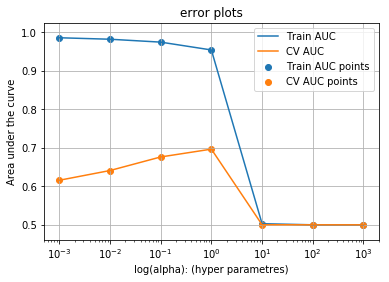

In [51]:
#importing multinomial naive bayes from sklearn package.
# from math import log: https://www.geeksforgeeks.org/log-functions-python/
from sklearn.naive_bayes import MultinomialNB
from math import log

train_auc = []   #creating empty list for store train auc alpha values 
cv_auc = []

alpha_parameters = [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]  #list with alpha hyper smoothing parameters  range

for i in (alpha_parameters):                                    #for each odd number in range smoothing_parameters
    nb_clf = MultinomialNB(alpha=i,   class_prior = [0.5,0.5])  # model using multinomialnaive bayes
    nb_clf.fit(X_tra, y_train)         #model fit on set1 train data
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_train_pred =  nb_clf.predict_proba(X_tra)[:,1]   #predicting log probablity score on train data
    y_cv_pred =  nb_clf.predict_proba(X_crv)[:,1]
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

#plotting the train and cv data AUC
plt.scatter(alpha_parameters, train_auc, label='Train AUC points')   #points alpha values  representation
plt.scatter(alpha_parameters, cv_auc, label='CV AUC points')
plt.plot(alpha_parameters, train_auc, label='Train AUC')  #plotting the train data area under the curve  with alpha values
plt.plot(alpha_parameters, cv_auc, label='CV AUC')        #plotting the cv data area under the curve   with alpha  values
plt.grid()
plt.xlabel("log(alpha): (hyper parametres)")   #printing log(alpha values on x-axis)
plt.xscale('log')                   #changing x- axis values into log values
plt.ylabel("Area under the curve")
plt.title("error plots")
plt.legend()
plt.show()


### observation:
* alpha values are laplace/additive smoothing parameters. 
* when smoothing parameter  at 0.001, 0.01, 0.1  then there is no use of laplace smoothing.
* at alpha value is 0 then our model  is overfit
* at alpha value is high then our model is under fit
* according to the above  plot we can choose 5 is  best alpha hyper parameter 

In [52]:
#according to the above for loop result we can choose 5 is our best  alpha smoothinghyper parameter

a = 5

### Now we can observe how our  best alpha smoothing parameter value perform on Train AUROC and Test AUROC curves

In [53]:
#funtion for predict probablity score
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points

    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

**plotting AUROC curve for train data and test data**

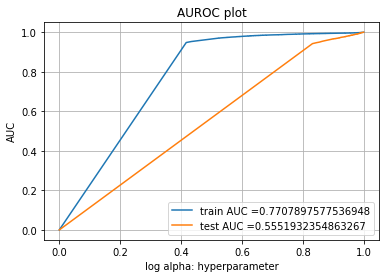

In [54]:
nb_clf = MultinomialNB(alpha=a,  class_prior=[0.5,0.5])   # alpha value is our selected value
nb_clf.fit(X_tra, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class

y_train_pred = batch_predict(nb_clf, X_tra)    
y_test_pred = batch_predict(nb_clf, X_tes)

#each  thresold (tow) caluculate the (train_fpr = false positive rate) and  (tpr = tru positive rate)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) #threshoulds on probablity score of train data class label
test_fpr, test_tpr, ts_thresholds = roc_curve(y_test, y_test_pred)#threshoulds on probablity score of test data class label

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))  #plot train auc  based on each threshold train tpr and train fpr
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))  #plot train auc  based on each threshold train tpr and train fpr
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("AUROC plot")
plt.grid()
plt.legend()
plt.show()

### observation:
1. train auc and test auc both are above to the ideal roc curve.
2. AUC(performence metric) on train data = 0.77 and AUC on test data = 0.55
3. then we can assume our model is good performence model. 

### <font color='purple'>Confusion matrix</font>

confusion matrix using for find  how many true_positive, true_negetive, false_positive and false negetive on train and test data
**confusion matrixs based on threshold values which has high tpr and low fpr values.**

In [55]:
#  function to   predict thresould value which has high tpr and low fpr values: notebooks/Assignment_SAMPLE_SOLUTION.ipynb
# select the threshold that can choose the  least false positive rating
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [56]:
from sklearn.metrics import confusion_matrix
print("Train data confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds,train_fpr, train_tpr)))     #predicting tpr,fpr,tnr,fnr on y_train of x train data
print("Test data confusion matrix")
print(confusion_matrix(y_test,predict(y_test_pred, ts_thresholds, test_fpr, test_tpr)))   #predicting tpr,fpr,tnr,fnr on y_test of x test data

Train data confusion matrix
the maximum value of tpr*(1-fpr) 0.5528808170286286 for threshold 1.0
[[ 4332  3094]
 [ 2174 39441]]
Test data confusion matrix
the maximum value of tpr*(1-fpr) 0.15873999482429466 for threshold 1.0
[[  920  4539]
 [ 1777 28816]]


**observation:**
* in train confusion matrix we have  39441 true positive values, 2174 fpr values,4332 tnr values,3094 fnr values 
* in test confusion matrix we have 28816 true positive values,1777 fpr values,  920 tnr values,4539 fnr values 

# 6.Creating (SET2):
# <font color='green'> data matix with all categorical, all numerical,essay(TFIDF) and title(TFIDF)</font>

In [57]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
#concatinating features
from scipy.sparse import hstack
X_tr1 = hstack((X_train_essay_tfidf,X_train_title_tfidf, X_train_state_onehot, X_train_teacher_prefix_onehot, X_train_proj_grade_onehot, X_train_proj_categories_onehot, X_train_proj_subcategories_onehot,X_train_prvs_posted_prjcts_norm, X_train_price_norm,X_train_quantity_norm )).tocsr()
X_cr1 = hstack((X_cv_essay_tfidf,X_cv_title_tfidf,   X_cv_state_onehot, X_cv_teacher_prefix_onehot,  X_cv_proj_grade_onehot, X_cv_proj_categories_onehot ,  X_cv_proj_subcategories_onehot,  X_cv_prvs_posted_prjcts_norm , X_cv_price_norm, X_cv_quantity_norm )).tocsr()
X_te1 = hstack((X_test_essay_tfidf,X_test_title_tfidf, X_test_state_onehot, X_test_teacher_prefix_onehot,X_test_proj_grade_onehot, X_test_proj_categories_onehot,X_test_proj_subcategories_onehot, X_test_prvs_posted_prjcts_norm, X_test_price_norm,X_test_quantity_norm  )).tocsr()

print("*"*60)
print("Final set2 Data matrix:")
print(X_tr1.shape, y_train.shape)
print(X_cr1.shape, y_cv.shape)
print(X_te1.shape, y_test.shape)

************************************************************
Final set2 Data matrix:
(49041, 259266) (49041,)
(24155, 259266) (24155,)
(36052, 259266) (36052,)


## <font color='red'>Applying Naive Bayes to SET2</font>
#### applying Multinomial Naive Bayes on set2(all categorical+ all numerical+essay(TFIDF) +and title(TFIDF))
## <font color='green'>finding the best hyper paremeter(alpha) using  Simple for loop</font>

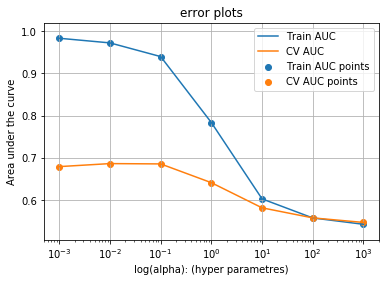

In [58]:
#importing multinomial naive bayes from sklearn package.
from sklearn.naive_bayes import MultinomialNB
from math import log

train_auc = []   #creating empty list for store train auc alpha values 
cv_auc = []

alpha_prametervalues = [10**-3, 10**-2, 10**-1, 1, 10**1, 10**2, 10**3]
#log_alpha_values = [log(k) for k in alpha_parameters]

for i in (alpha_prametervalues):                                    #for each odd number in range smoothing_parameters
    naive_b = MultinomialNB(alpha=i,  class_prior=[0.5,0.5])  # model using multinomialnaive bayes
    naive_b.fit(X_tr1, y_train)         #model fit on set1 train data
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_train_pred =  naive_b.predict_proba(X_tr1)[:,1]   #predicting probablity score on train data
    y_cv_pred =  naive_b.predict_proba(X_cr1)[:,1]
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

#plotting the train and cv data AUC
plt.scatter(alpha_prametervalues, train_auc, label='Train AUC points')   #points alpha values  representation
plt.scatter(alpha_prametervalues, cv_auc, label='CV AUC points')
plt.plot(alpha_prametervalues, train_auc, label='Train AUC')  #plotting the train data area under the curve  with alpha values
plt.plot(alpha_prametervalues, cv_auc, label='CV AUC')        #plotting the cv data area under the curve   with alpha  values
plt.grid()
plt.xlabel("log(alpha): (hyper parametres)")   #printing log(alpha values on x-axis)
plt.xscale('log')                   #changing x- axis values into log values
plt.ylabel("Area under the curve")
plt.title("error plots")
plt.legend()
plt.show()

### observation:
* alpha values are laplace/additive smoothing parameters. 
* when smoothing parameter  at 0.001, 0.01, 0.1,  then there is no use of laplace smoothing.
* at alpha value is 0 then our model  is overfit
* at alpha value is high then our model is under fit
* according to the above  plot we can choose 10 is  best alpha hyper parameter 

In [59]:
#according to the above for loop result we can choose 10 is our best  alpha smoothinghyper parameter

b = 10

### Now we can observe how our  best alpha smoothing parameter value perform on Train AUROC and Test AUROC curves

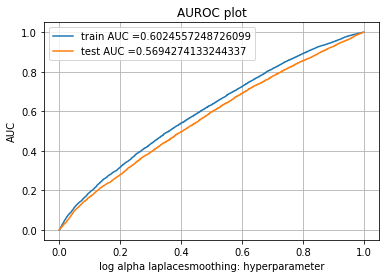

In [60]:
naive_b = MultinomialNB(alpha=b, class_prior=[0.5,0.5])   # alpha value is our selected value
naive_b.fit(X_tr1, y_train)
#roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class

y_train_pred = batch_predict(naive_b, X_tr1)    
y_test_pred = batch_predict(naive_b, X_te1)

#each  thresold (tow) caluculate the (train_fpr = false positive rate) and  (tpr = tru positive rate)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) #threshoulds on probablity score of train data class label
test_fpr, test_tpr, ts_thresholds = roc_curve(y_test, y_test_pred)#threshoulds on probablity score of test data class label

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))  #plot train auc  based on each threshold train tpr and train fpr
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))  #plot train auc  based on each threshold train tpr and train fpr
plt.xlabel("log alpha laplacesmoothing: hyperparameter")
plt.ylabel("AUC")
plt.title("AUROC plot")
plt.grid()
plt.legend()
plt.show()

### observation:
1. train auc and test auc both are above to the ideal roc curve.
2. AUC(performence metric) on train data = 0.60 and AUC on test data = 0.56


### <font color='purple'>Confusion matrix</font>

confusion matrix using for find  how many true_positive, true_negetive, false_positive and false negetive on train and test data

In [61]:
from sklearn.metrics import confusion_matrix
print("Train data confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds,train_fpr, train_tpr)))     #predicting tpr,fpr,tnr,fnr on y_train of x train data
print("Test data confusion matrix")
print(confusion_matrix(y_test,predict(y_test_pred, ts_thresholds, test_fpr, test_tpr)))   #predicting tpr,fpr,tnr,fnr on y_test of x test data

Train data confusion matrix
the maximum value of tpr*(1-fpr) 0.32434077669183475 for threshold 1.0
[[ 4288  3138]
 [18240 23375]]
Test data confusion matrix
the maximum value of tpr*(1-fpr) 0.30011585070288027 for threshold 1.0
[[ 2928  2531]
 [13475 17118]]


**observation:**
* in train confusion matrix we have23375 true positive values,18240 fpr values,4288 tnr values,3138 fnr values 
* in test confusion matrix we have 17118 true positive values,13475 fpr values,2928 tnr values,2531 fnr values 

# <font color='purple'>7.select the top 20 fetures on set2 using absolute values of coef_(feauture_log_prob)</font>

* vectorizer3 = tfidf of essay_preprocessed_text, vectorer4 = tfidf of title_preprocessedtext, 
* vectorizer6,vectorizer7, vectorizer9 and vectorizer10  are Onehotencoded categorical features
* normalizer10,normalizer11 and normalizer12 are normalized numerical features


In [62]:
max_ind_positive=np.argsort((naive_b.feature_log_prob_)[1])[ : : -1][0:10]  #naive_b applied on bow vectorized data
max_ind_negetive=np.argsort((naive_b.feature_log_prob_)[0])[ : : -1][0:10]  #top 10 on negetive class

In [63]:
#vectorizer3,vectorizer4,-->tfidf vectorized features
#vectorizer6,vectorizer7,vectorizer8,vectorizer9,vectorizer10,--->categorical features
lst=[ ]  #creating empty list
lst.extend(vectorizer3.get_feature_names()) #for every bow and category we will be storing feature names in l.
lst.extend(vectorizer4.get_feature_names())
lst.extend(vectorizer6.get_feature_names())
lst.extend(vectorizer7.get_feature_names())
lst.extend(vectorizer8.get_feature_names())
lst.extend(vectorizer9.get_feature_names())
lst.extend(vectorizer10.get_feature_names())
#appending a numerical features
lst.append('Price')
lst.append('teacher_number_of_previously_posted_projects')
lst.append('quantity')

In [64]:
print(np.take(lst,max_ind_positive))    #printing top 10 features from positive class
print(np.take(lst,max_ind_negetive))    #printing top 10 features from negative class

['quantity' 'teacher_number_of_previously_posted_projects' 'Price'
 'health_sports' 'communityservice' 'appliedsciences' 'earlydevelopment'
 'history_civics' 'music_arts' 'teamsports']
['quantity' 'teacher_number_of_previously_posted_projects' 'Price'
 'health_sports' 'communityservice' 'appliedsciences' 'earlydevelopment'
 'history_civics' 'music_arts' 'warmth']


# Summary(Conclusion):
* we have performed multi nomial naive bayes   on all vectorized categorical(one-hot-encode), all numerical features and each text(bow,tfidf).
* we have find best 'alpha' hyper parameter by using simple for loop method and multinomial naive bayes classifier for 2 sets data.
* we can  observe all AUROC values on plots for each set(se1,set2) then we can choose best alpha value  on set1 which consists train auc is 0.77 test auc 0.55 then we can select best hyper smoothing laplace parameter value is 5.
* cofusion matrix  gives us clear details about how many true positive points and false positive points,true negetive points and false negetive points for each set data.
* we have selected top 10 least and top features in set1 data using absolute values of coefficient.
* multi nomial naive bayes applicable for count vectorized features.


# Summary in Tabular form
### all results summarized in the tabular form

In [68]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
a = PrettyTable()
a.field_names = ["data with vectorized features","Model","Hyper_parameter_best_alpha value", "AUC"]

a.add_row(["set1(all nmrcl,catgrc+essay & tite(BOW))", 'multinomial_NB',5,0.77 ])
a.add_row(["set2(all nmrcl,catgrc+essay & tite(TFIDF)", 'multinomial_NB',10,0.60])
print(a)

+-------------------------------------------+----------------+----------------------------------+------+
|       data with vectorized features       |     Model      | Hyper_parameter_best_alpha value | AUC  |
+-------------------------------------------+----------------+----------------------------------+------+
|  set1(all nmrcl,catgrc+essay & tite(BOW)) | multinomial_NB |                5                 | 0.77 |
| set2(all nmrcl,catgrc+essay & tite(TFIDF) | multinomial_NB |                10                | 0.6  |
+-------------------------------------------+----------------+----------------------------------+------+
